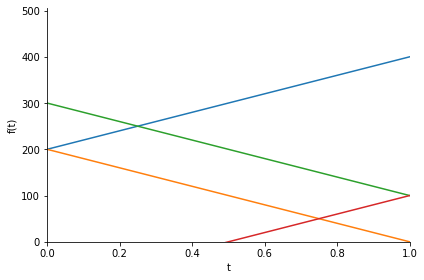

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sympy import * 
from sympy.plotting import plot


x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)


v0u = plot((a*t+v_0).subs(v_0,200).subs(a,200), show=False,xlim=(0,1), ylim=(0,505))
v0d = plot((-a*t+v_0).subs(v_0,200).subs(a,200), show=False,xlim=(0,1), ylim=(0,505))

v1u = plot((-a*(t-t_f)+v_1).subs(v_1,100).subs(a,200).subs(t_f,1), show=False, xlim=(0,1), ylim=(0,505))
v1d = plot((a*(t-t_f)+v_1).subs(v_1,100).subs(a,200).subs(t_f,1), show=False, xlim=(0,1), ylim=(0,505))

v0u.append(v0d[0])
v0u.append(v1u[0])
v0u.append(v1d[0])

v0u.show()

In [215]:
# Solve the triangle using line equations 
# Given x, v0, v1. Accelerate to v_c, then back down
%reset -f 
from sympy import * 
import math 
from trajectory.trapmath import *
from sympy.solvers.solveset import linsolve

x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

# Simple trapezoid equation

t_a = (v_c - v_0) / a
t_d = (v_1 - v_c) / -a

x_a = ((v_0 + v_c) / 2) * t_a
x_d = ((v_c + v_1) / 2) * t_d

x_a_ = a*t_a**2/2 + v_0
x_d_ = a*t_d**2/2 + v_1

x_c = x - ( x_a + x_d ) 
t_c = x_c/v_c

x_pent = simplify(x_a+x_c+x_d)


#==================

# Linear equations

v0_u  =  a*t+v_0
v0_d  =  -a*t+v_0

v1_u  = -a*(t-t_f)+v_1
v1_d  = a*(t-t_f)+v_1

e_v0 = Eq(v,v0_u)
e_v1 = Eq(v,v1_u)

# =================

e_x =   Eq(x,   (v_0 + v_1)/2 * t)  # No a
e_t =   Eq(x,   (a*t**2)/2)         # No v
e_v_1 = Eq(v_1, (v_0 - a*t))        # No x

# Solve for V_C for an accel profile -- no decel phase
solve(Eq(x,x_a+ (v_c * (t-t_a))), v_c)

# Lower Intersection
t_i = solve(Eq(v0_d , v1_d), t)[0]

# Upper Intersection
t_u =solve(Eq(v0_u , v1_u), t)[0]

solve(x_c, v_c)


[-sqrt(4*a_max*x + 2*v_0**2 + 2*v_1**2)/2,
 sqrt(4*a_max*x + 2*v_0**2 + 2*v_1**2)/2]

In [225]:
%reset -f 
from sympy import  * 
x,t,a,v_0,v_c,v_1,t_a,t_d,v_max= symbols('x,t,a,v_0,v_c,v_1,t_a,t_d,v_max')

t_a = (v_c - v_0) / a
t_d = (v_1 - v_c) / -a

x_a = ((v_0 + v_c) / 2) * t_a
x_d = ((v_c + v_1) / 2) * t_d


x_c = x - ( x_a + x_d )
solve(x_c, v_c)[1]

sqrt(4*a*x + 2*v_0**2 + 2*v_1**2)/2

In [213]:
# Triangular profiles
%reset -f 
from sympy import * 
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

t_a = ((v_c - v_0) / a)
t_d = ((v_1 - v_c) / a)
x_a_ = a*t_a**2/2 + v_0
x_d_ = a*t_d**2/2 + v_1

str(simplify(t_a+t_d))

x_ad = (x_a_+x_d_)

display(solve(simplify(Eq(x, x_ad)), v_c)[0])


v_0/2 + v_1/2 - sqrt(-4*a_max*v_0 - 4*a_max*v_1 + 4*a_max*x - v_0**2 + 2*v_0*v_1 - v_1**2)/2

NameError: name 't_a_' is not defined

In [40]:
solve(Eq(v_1**2, (v_0-sqrt(2*x*a))**2), x)[0]

(v_0**2 - 2*v_0*v_1 + v_1**2)/(2*a_max)

In [75]:
%reset -f 
from sympy import * 
from IPython.display import HTML
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

e1 = Eq(x, a*t**2/2)
display(e1)
e2 = Eq(v_1, v_c+a*t)
display(e2)
display(HTML('Distance traveled in acceleration'))
solve(Eq(solve(e2, t)[0], solve(e1, t)[0]),x)[0]

Eq(x, a_max*t**2/2)

Eq(v_1, a_max*t + v_c)

(v_1 - v_c)**2/(2*a_max)

In [ ]:
x_a = (v_0-v_c)**2/(2*a)
x_d = (v_c-v_1)**2/(2*a)
solve(x_a+x_d, v_c)[0]

In [70]:
simplify((x_a+x_d).subs(v_1,1000).subs(v_0,3000).subs(a,50_000))

v_c**2/50000 - 2*v_c/25 + 100

In [79]:
%reset -f 
from sympy import * 
from IPython.display import HTML
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

t_ad = (v_0-v_1)/a
x_ad = (v_0+v_1)/2*t_ad
str(simplify(x_ad))

'(v_0 - v_1)*(v_0 + v_1)/(2*a_max)'